# Assignment 4

In [62]:
import numpy as np
import sympy as sp
from qutip import *
import matplotlib.pyplot as plt
sp.init_printing()

## Problem 1(a)

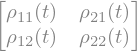

In [63]:
# Set up the density matrix
t = sp.Symbol('t', real=True)
rho = sp.Matrix([[sp.Function('rho_' + i + j)(t) for i in ['1', '2']] for j in ['1', '2']])
# rho[1,1] = 1 - rho[0,0]
rho

In [64]:
# Define the lowering operator
sm = sp.Matrix([[0, 0], [1, 0]])

commutator = lambda A, B: A*B - B*A
antiCommutator = lambda A, B: A*B + B*A

In [65]:
Omega = 0  #sp.symbols('Omega')
Gamma = sp.symbols('Gamma')
omega = sp.symbols('omega')

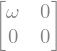

In [66]:
# Define the Hamiltonian
H = omega * sm.H * sm + Omega * (sm.H + sm) 
H

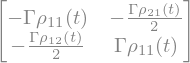

In [67]:
# Define the Lindblad operator
L = Gamma * (sm * rho * sm.H - sp.Rational(1,2) * antiCommutator(sm.H * sm, rho))
L

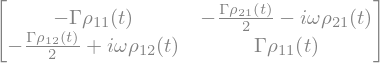

In [68]:
rhs = -sp.I * commutator(H, rho) + L
rhs

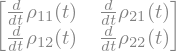

In [69]:
lhs = rho.applyfunc(lambda x: sp.diff(x, t))
lhs

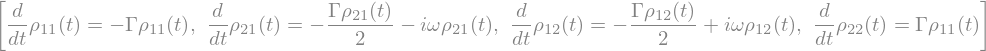

In [70]:
eqnlist = [sp.Eq(lhs[i,j], rhs[i,j]) for i in range(2) for j in range(2)]
eqnlist

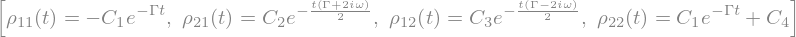

In [71]:
solution = sp.dsolve(eqnlist)
solution

## Problem 1(b)

In [73]:
ics = {rho[0,0].subs(t, 0): 1, rho[1,1].subs(t, 0): 0, rho[0,1].subs(t, 0): 0, rho[1,0].subs(t, 0): 0}
solution = sp.dsolve(eqnlist, ics=ics)

In [74]:
solution